# Pandas

pandas - фраемворк для работы с табличными данными

Установка <code>pip install pandas</code>

In [1]:
import numpy as np
import pandas as pd # стандартная запись импорта pandas

## pd.Series

pd.Series - один из двух основных типов данных в pandas

pd.Series представляет собой столбец/строку таблицы

### Создание pd.Series

pd.Series можно создать из любого итерируемого объекта

In [2]:
pd.Series([1, 2, 3])

0    1
1    2
2    3
dtype: int64

In [3]:
pd.Series({0:1, 1:2, 2:3}) # для словаря происходит преобразование ключей в индексы и значений в значения

0    1
1    2
2    3
dtype: int64

In [4]:
pd.Series((i for i in range(5)))

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [5]:
pd.Series([1, 2, 3], name='test') # можно задать имя, имя используется как имя колонки в pd.DataFrame

0    1
1    2
2    3
Name: test, dtype: int64

In [6]:
pd.concat([pd.Series([1, 2, 3], name='test'), pd.Series([4, 5, 6], name='answer')], axis=1) # pd.concat соеденяет pd.Series

,test,answer
0,1,4
1,2,5
2,3,6


In [7]:
pd.Series([1, 2, 3], name='test', index=[3, 4, 5]) # так же можно задать индексы

3    1
4    2
5    3
Name: test, dtype: int64

In [8]:
pd.Series([1, 2, 3], name='test', index=['a', 'b', 'c']) # индексы могут быть и строковыми

a    1
b    2
c    3
Name: test, dtype: int64

In [9]:
# pd.date_range возвращает DatetimeIndex от start до end включительно в количестве равным periods
pd.date_range(start='20190805', end='20190806', periods=3)

DatetimeIndex(['2019-08-05 00:00:00', '2019-08-05 12:00:00',
               '2019-08-06 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [10]:
pd.Series([1, 2, 3], name='test', index=pd.date_range(start='20190805', end='20190806', periods=3)) # и даже datetime

2019-08-05 00:00:00    1
2019-08-05 12:00:00    2
2019-08-06 00:00:00    3
Name: test, dtype: int64

pd.Series - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

### индексирование pd.Series

для индексирования pd.Series есть 2 метода:

.loc - используется при \_\_getitem__, индексирует по имени индекса

.iloc - индексирует по порядковому номеру, аналогичен индексированию в numpy

In [11]:
a = pd.Series(range(5), index=['a', 'b', 'c', 'd', 'e'])

In [12]:
a

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [13]:
a['a']

0

In [14]:
a.loc['a']

0

In [15]:
a[['a', 'c']] # индексирование похоже на numpy

a    0
c    2
dtype: int64

In [16]:
a[a.index < 'd']

a    0
b    1
c    2
dtype: int64

In [17]:
a[a < 3] # логические индексы по значениям работают только для .loc

a    0
b    1
c    2
dtype: int64

In [18]:
a[(a < 2) | (a > 3)] # или, каждое условие в скобке

a    0
b    1
e    4
dtype: int64

In [19]:
a[(a > 2) & (a < 4)] # и

d    3
dtype: int64

In [19]:
c = pd.Series(range(10000))

In [20]:
c.head(10) # первые n элементов, по умолчанию 5

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [21]:
c.tail(8) # последние n эдементов, по умолчанию 5

9992    9992
9993    9993
9994    9994
9995    9995
9996    9996
9997    9997
9998    9998
9999    9999
dtype: int64

In [22]:
c.head(100).tail(5)

95    95
96    96
97    97
98    98
99    99
dtype: int64

индексирование pd.Series - https://pandas.pydata.org/pandas-docs/stable/reference/series.html#indexing-iteration

### Арифметические операции с pd.Series 

работа со скалярами полностью аналогична np.array

разница при работе с pd.Series, необходимо совпадение индексов

In [23]:
a

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [24]:
b = pd.Series(range(4), ['c', 'd', 'e', 'f'])

In [25]:
a + b # не совпадающие индексы будут заполенены np.nan, пустое значение

a    NaN
b    NaN
c    2.0
d    4.0
e    6.0
f    NaN
dtype: float64

In [26]:
(a + b).fillna(-1) # fillna заполняет пропуски

a   -1.0
b   -1.0
c    2.0
d    4.0
e    6.0
f   -1.0
dtype: float64

In [27]:
a*b

a    NaN
b    NaN
c    0.0
d    3.0
e    8.0
f    NaN
dtype: float64

In [28]:
a/b # inf при делении на ноль

a    NaN
b    NaN
c    inf
d    3.0
e    2.0
f    NaN
dtype: float64

In [29]:
np.log1p(a) # операции numpy доступны для pd.Series

a    0.000000
b    0.693147
c    1.098612
d    1.386294
e    1.609438
dtype: float64

Статистика полностью аналогична np.array с той лишь разницей, что оценки по умолчанию несмещенные

Операции с pd.Series - https://pandas.pydata.org/pandas-docs/stable/reference/series.html#binary-operator-functions

### Визуализация pd.Series 

In [30]:
a = pd.Series(np.random.normal(5, 2, 1000)) # нормальное распеределение с центром 5 и отклонением 2, размера 100

In [31]:
a.head()

0    7.682948
1    3.118892
2    3.104965
3    6.403348
4    5.109102
dtype: float64

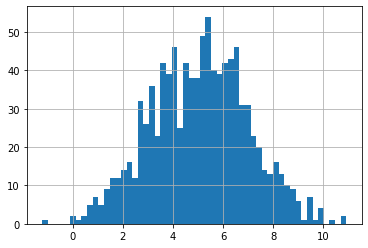

In [32]:
a.hist(bins=int(np.sqrt(3*a.shape[0]))); # гистограмма, bins - количество столбцов

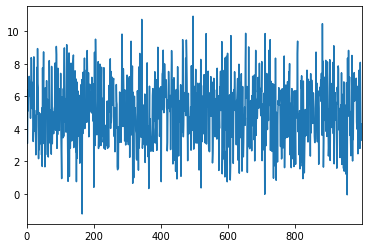

In [33]:
a.plot(); # значение pd.Series по отношению к индексу

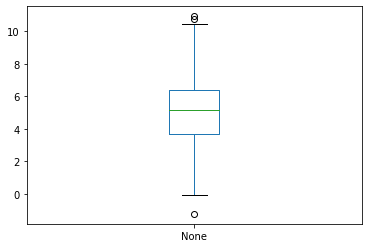

In [34]:
a.plot.box(); # boxplot

визуализация pd.Series - https://pandas.pydata.org/pandas-docs/stable/reference/series.html#plotting

### map и apply

map - принимает в себя объект с парами ключ-значение и возвращает значение по ключу из элементов pd.Series

In [35]:
d = {i: i**2 for i in range(100)}

In [36]:
a = pd.Series(range(100))

In [37]:
a.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [38]:
a.map(d).head()

0     0
1     1
2     4
3     9
4    16
dtype: int64

apply - применяет функцию к каждому элементу pd.Series

In [39]:
a.apply(lambda x: x % 3).head(10)

0    0
1    1
2    2
3    0
4    1
5    2
6    0
7    1
8    2
9    0
dtype: int64

### expanding  и rolling

expanding - возвращает увеличивающийся срез pd.Series начиная с n элементов

In [40]:
a.expanding(2).mean().head(10)

0    NaN
1    0.5
2    1.0
3    1.5
4    2.0
5    2.5
6    3.0
7    3.5
8    4.0
9    4.5
dtype: float64

rolling - возвращает движущееся окно размером n

In [41]:
a.rolling(2).mean().head()

0    NaN
1    0.5
2    1.5
3    2.5
4    3.5
dtype: float64

https://pandas.pydata.org/pandas-docs/stable/reference/series.html#function-application-groupby-window

### другие полезные функции

In [42]:
a = pd.Series(range(3))
b = pd.Series(range(3))

In [43]:
a.append(b) # объеденение pd.Series

0    0
1    1
2    2
0    0
1    1
2    2
dtype: int64

In [44]:
a = pd.Series(np.random.rand(100), index=np.random.randint(1, 1000, 100))

In [45]:
a.head()

684    0.369857
811    0.964525
6      0.309163
654    0.168934
604    0.046409
dtype: float64

In [46]:
a.sort_values(ascending=True).head() # сортировка по значение, параметр inplace изменит pd.Series на месте

471    0.018269
183    0.018854
244    0.038924
604    0.046409
365    0.070136
dtype: float64

In [47]:
a.sort_index(ascending=False).head() # сортрировка по индексу

991    0.829073
990    0.618231
971    0.610461
963    0.973144
961    0.831103
dtype: float64

In [48]:
a.reset_index(inplace=True, drop=True) # сброс индекса на стандартный (порядковый номер)

In [49]:
a.head()

0    0.369857
1    0.964525
2    0.309163
3    0.168934
4    0.046409
dtype: float64

методы pd.Series - https://pandas.pydata.org/pandas-docs/stable/reference/series.html#

## pd.DataFrame 

pd.DataFrame - представляет собой двумерный массив с индексами строк и колонок, таблица в SQL

каждая из колонок и строк pd.DataFrame это отдельный pd.Series

###  создание pd.DataFrame

dataframe может быть создан из двумерных массивов, словарей, списков и много другого

In [50]:
pd.DataFrame(np.random.rand(4, 4))

,0,1,2,3
0,0.745579,0.689889,0.080216,0.973221
1,0.032717,0.852322,0.323671,0.684417
2,0.704123,0.100962,0.939778,0.371947
3,0.016733,0.457337,0.900673,0.900006


In [51]:
pd.DataFrame(np.random.rand(4, 4), columns=['a', 'b', 'c', 'd'])

,a,b,c,d
0,0.651673,0.784702,0.153809,0.956154
1,0.699962,0.099571,0.692527,0.664621
2,0.560052,0.054631,0.472469,0.140208
3,0.759198,0.141865,0.648404,0.350315


In [52]:
pd.DataFrame({'a': [1, 2], 'b': [3, 4]}, index=['c', 'd'])

,a,b
c,1,3
d,2,4


конструктор pd.DataFrame - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

### индексирование pd.DataFrame

есть 3 типа индекса в pd.DataFrame

основной \_\_getitem__ - индекс по столбцам

.loc - индекс по имени строк

.iloc - порядковый индекс

In [53]:
data = pd.DataFrame({'round': [(i // 3) + 1 for i in range(300)],
                     'player': [1, 2, 3] * 100, 
                     '1st_dice': np.random.randint(1, 7, 300),
                     '2nd_dice': np.random.randint(1, 7, 300),
                     '3rd_dice': np.random.randint(1, 7, 300)},
                     index=range(10, 310)) # моделирование игры в кости

In [54]:
data.info() # количество заполненных значений и их тип по колонкам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 10 to 309
Data columns (total 5 columns):
round       300 non-null int64
player      300 non-null int64
1st_dice    300 non-null int32
2nd_dice    300 non-null int32
3rd_dice    300 non-null int32
dtypes: int32(3), int64(2)
memory usage: 8.3 KB


In [55]:
data.head(10)

,round,player,1st_dice,2nd_dice,3rd_dice
10,1,1,5,2,5
11,1,2,3,4,1
12,1,3,2,3,2
13,2,1,5,3,4
14,2,2,1,3,3
15,2,3,4,5,4
16,3,1,6,6,4
17,3,2,3,4,6
18,3,3,5,3,2
19,4,1,3,2,6


In [56]:
data['round'].head()

10    1
11    1
12    1
13    2
14    2
Name: round, dtype: int64

In [57]:
data[['round', '1st_dice']].head()  # индекс по нескольким столбцам возвращает pd.DataFrame иначе pd.Series

,round,1st_dice
10,1,5
11,1,3
12,1,2
13,2,5
14,2,1


In [58]:
data[(data['1st_dice'] > 3) | (data['2nd_dice'] < 6)].head() # при основном индексировании, логический индекс идет по строке

,round,player,1st_dice,2nd_dice,3rd_dice
10,1,1,5,2,5
11,1,2,3,4,1
12,1,3,2,3,2
13,2,1,5,3,4
14,2,2,1,3,3


In [59]:
data.loc[[13, 14]] # индекс по нескольким строкам возвращает pd.DataFrame иначе pd.Series

,round,player,1st_dice,2nd_dice,3rd_dice
13,2,1,5,3,4
14,2,2,1,3,3


In [60]:
data.loc[[13, 14], ['round', 'player']] # после запятой мы можем указать колонки для выбора

,round,player
13,2,1
14,2,2


In [61]:
# логический индекс применяется в строковой части
data.loc[(data['round'] % 3 == 1), ['round', 'player', '1st_dice']].head(10)

,round,player,1st_dice
10,1,1,5
11,1,2,3
12,1,3,2
19,4,1,3
20,4,2,5
21,4,3,1
28,7,1,6
29,7,2,5
30,7,3,6
37,10,1,4


In [62]:
data.iloc[[1, 2]] # порядковый индекс может принимать либо массив индексов строк, либо один индекс строки

,round,player,1st_dice,2nd_dice,3rd_dice
11,1,2,3,4,1
12,1,3,2,3,2


In [63]:
data['new_column'] = 'new' # добавление новой колонки

In [64]:
data.head()

,round,player,1st_dice,2nd_dice,3rd_dice,new_column
10,1,1,5,2,5,new
11,1,2,3,4,1,new
12,1,3,2,3,2,new
13,2,1,5,3,4,new
14,2,2,1,3,3,new


data.index - массив индекса dataframe

data.column - массив колонок dataframe

In [65]:
data.loc[data.index.max() + 1] = {'round': 310, 'player': 1, '1st_dice': 3, '2nd_dice': 4, 
                                  '3rd_dice': 5, 'new_column': 'new'}

In [66]:
data.tail()

,round,player,1st_dice,2nd_dice,3rd_dice,new_column
306,99,3,4,6,6,new
307,100,1,6,4,2,new
308,100,2,3,4,2,new
309,100,3,2,3,4,new
310,310,1,3,4,5,new


индексация pd.DataFrame - https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#indexing-iteration

### Арифметические и статические операции

арифметические операции аналогичны pd.Series, с той разницей что теперь появляется спецификация осей, для общих функций

In [67]:
data.sum() # axis=0 по умолчанию

round                                                     15460
player                                                      601
1st_dice                                                   1075
2nd_dice                                                   1036
3rd_dice                                                   1076
new_column    newnewnewnewnewnewnewnewnewnewnewnewnewnewnewn...
dtype: object

In [68]:
data.mean(axis=1).head()

10    2.8
11    2.2
12    2.2
13    3.0
14    2.2
dtype: float64

In [69]:
# скаляр применяется ко всему датафрейму
# если имеются элементы с нечисловыми значениями будет вызвана ошибка
(data[['round', '1st_dice']] + 1).head() 

,round,1st_dice
10,2,6
11,2,4
12,2,3
13,3,6
14,3,2


In [70]:
data.nunique() # количество уникальных значений, не учитывая np.nan

round         101
player          3
1st_dice        6
2nd_dice        6
3rd_dice        6
new_column      1
dtype: int64

In [71]:
data.describe(include='all') # статистическая сводка по датасету

,round,player,1st_dice,2nd_dice,3rd_dice,new_column
count,301.000000,301.000000,301.000000,301.000000,301.000000,301
unique,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,new
freq,NaN,NaN,NaN,NaN,NaN,301
mean,51.362126,1.996678,3.571429,3.441860,3.574751,NaN
std,32.511102,0.818529,1.764194,1.716812,1.674881,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,26.000000,1.000000,2.000000,2.000000,2.000000,NaN
50%,51.000000,2.000000,4.000000,3.000000,4.000000,NaN
75%,76.000000,3.000000,5.000000,5.000000,5.000000,NaN


In [72]:
data.corr(method='pearson') # таблица корелляции между признаками

,round,player,1st_dice,2nd_dice,3rd_dice
round,1.000000,-0.032397,0.063563,-0.003712,0.039016
player,-0.032397,1.000000,-0.054081,0.119650,0.023280
1st_dice,0.063563,-0.054081,1.000000,-0.035218,-0.084446
2nd_dice,-0.003712,0.119650,-0.035218,1.000000,-0.008627
3rd_dice,0.039016,0.023280,-0.084446,-0.008627,1.000000


арифмитические операции в pd.DataFrame - https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats

### Drop, join, concat, merge, reindex, pivot

In [73]:
data.loc[311] = data.loc[10] # добавление дуплицирующей строки

In [74]:
data.tail()

,round,player,1st_dice,2nd_dice,3rd_dice,new_column
307,100,1,6,4,2,new
308,100,2,3,4,2,new
309,100,3,2,3,4,new
310,310,1,3,4,5,new
311,1,1,5,2,5,new


In [75]:
data.shape

(302, 6)

In [76]:
data.drop_duplicates().tail() # удаление дубликатов строк

,round,player,1st_dice,2nd_dice,3rd_dice,new_column
306,99,3,4,6,6,new
307,100,1,6,4,2,new
308,100,2,3,4,2,new
309,100,3,2,3,4,new
310,310,1,3,4,5,new


In [77]:
data.drop_duplicates().shape

(301, 6)

In [78]:
# можем специфицировать колонки
data.drop_duplicates(['player', '1st_dice', '2nd_dice', '3rd_dice', 'new_column']).shape

(237, 6)

In [79]:
# изменение датафрейма на месте
data.drop_duplicates(inplace=True)

In [80]:
data.shape

(301, 6)

In [81]:
data.drop(310, axis=0).tail() # удаление строки по индексу

,round,player,1st_dice,2nd_dice,3rd_dice,new_column
305,99,2,1,3,6,new
306,99,3,4,6,6,new
307,100,1,6,4,2,new
308,100,2,3,4,2,new
309,100,3,2,3,4,new


In [82]:
data.drop(index=[310], inplace=True)

In [83]:
data.drop(columns=["new_column"], inplace=True)

In [84]:
new_dice = pd.DataFrame({'4th_dice': np.random.randint(1, 7, 300),
                         '5th_dice': np.random.randint(1, 7, 300)}, index=range(15, 315))

In [85]:
new_dice.head()

,4th_dice,5th_dice
15,5,6
16,3,3
17,3,2
18,1,1
19,5,5


In [86]:
# соедение датафреймов по столбцам/строкам в зависимости от axis
# соеденение происходит по индексам, если у какого датафрейма нет этого индекса
# все значения колонок будут заполнены np.nan
pd.concat([data, new_dice], axis=1).head(10)

,round,player,1st_dice,2nd_dice,3rd_dice,4th_dice,5th_dice
10,1.0,1.0,5.0,2.0,5.0,NaN,NaN
11,1.0,2.0,3.0,4.0,1.0,NaN,NaN
12,1.0,3.0,2.0,3.0,2.0,NaN,NaN
13,2.0,1.0,5.0,3.0,4.0,NaN,NaN
14,2.0,2.0,1.0,3.0,3.0,NaN,NaN
15,2.0,3.0,4.0,5.0,4.0,5.0,6.0
16,3.0,1.0,6.0,6.0,4.0,3.0,3.0
17,3.0,2.0,3.0,4.0,6.0,3.0,2.0
18,3.0,3.0,5.0,3.0,2.0,1.0,1.0
19,4.0,1.0,3.0,2.0,6.0,5.0,5.0


In [87]:
pd.concat([data, new_dice], axis=0, sort=False).head(5)

,round,player,1st_dice,2nd_dice,3rd_dice,4th_dice,5th_dice
10,1.0,1.0,5.0,2.0,5.0,NaN,NaN
11,1.0,2.0,3.0,4.0,1.0,NaN,NaN
12,1.0,3.0,2.0,3.0,2.0,NaN,NaN
13,2.0,1.0,5.0,3.0,4.0,NaN,NaN
14,2.0,2.0,1.0,3.0,3.0,NaN,NaN


In [88]:
pd.concat([data, new_dice], axis=0, sort=False).tail(5)

,round,player,1st_dice,2nd_dice,3rd_dice,4th_dice,5th_dice
310,NaN,NaN,NaN,NaN,NaN,5.0,5.0
311,NaN,NaN,NaN,NaN,NaN,3.0,4.0
312,NaN,NaN,NaN,NaN,NaN,4.0,2.0
313,NaN,NaN,NaN,NaN,NaN,1.0,5.0
314,NaN,NaN,NaN,NaN,NaN,5.0,1.0


In [89]:
data = pd.concat([data, new_dice], axis=1)

In [90]:
age = pd.DataFrame({'player': [1, 2, 3],
                    'age': [25, 27, 30]})

In [91]:
age

,player,age
0,1,25
1,2,27
2,3,30


In [92]:
pd.merge(data, age, on='player', how='left').head(10) # соеденение 2х датафреймов по столбцу, работает как join в sql

,round,player,1st_dice,2nd_dice,3rd_dice,4th_dice,5th_dice,age
0,1.0,1.0,5.0,2.0,5.0,NaN,NaN,25.0
1,1.0,2.0,3.0,4.0,1.0,NaN,NaN,27.0
2,1.0,3.0,2.0,3.0,2.0,NaN,NaN,30.0
3,2.0,1.0,5.0,3.0,4.0,NaN,NaN,25.0
4,2.0,2.0,1.0,3.0,3.0,NaN,NaN,27.0
5,2.0,3.0,4.0,5.0,4.0,5.0,6.0,30.0
6,3.0,1.0,6.0,6.0,4.0,3.0,3.0,25.0
7,3.0,2.0,3.0,4.0,6.0,3.0,2.0,27.0
8,3.0,3.0,5.0,3.0,2.0,1.0,1.0,30.0
9,4.0,1.0,3.0,2.0,6.0,5.0,5.0,25.0


In [93]:
data = pd.merge(data, age, on='player', how='left')

In [94]:
data.reset_index(drop=False).head() # замена на индекс по умолчанию

,index,round,player,1st_dice,2nd_dice,3rd_dice,4th_dice,5th_dice,age
0,0,1.0,1.0,5.0,2.0,5.0,NaN,NaN,25.0
1,1,1.0,2.0,3.0,4.0,1.0,NaN,NaN,27.0
2,2,1.0,3.0,2.0,3.0,2.0,NaN,NaN,30.0
3,3,2.0,1.0,5.0,3.0,4.0,NaN,NaN,25.0
4,4,2.0,2.0,1.0,3.0,3.0,NaN,NaN,27.0


In [95]:
data.reset_index(drop=True).head() # не возвращать колонку индекса

,round,player,1st_dice,2nd_dice,3rd_dice,4th_dice,5th_dice,age
0,1.0,1.0,5.0,2.0,5.0,NaN,NaN,25.0
1,1.0,2.0,3.0,4.0,1.0,NaN,NaN,27.0
2,1.0,3.0,2.0,3.0,2.0,NaN,NaN,30.0
3,2.0,1.0,5.0,3.0,4.0,NaN,NaN,25.0
4,2.0,2.0,1.0,3.0,3.0,NaN,NaN,27.0


In [96]:
data.set_index('round').head() # устанавливает колонку в качестве индекса

,player,1st_dice,2nd_dice,3rd_dice,4th_dice,5th_dice,age
round,,,,,,,
1.0,1.0,5.0,2.0,5.0,NaN,NaN,25.0
1.0,2.0,3.0,4.0,1.0,NaN,NaN,27.0
1.0,3.0,2.0,3.0,2.0,NaN,NaN,30.0
2.0,1.0,5.0,3.0,4.0,NaN,NaN,25.0
2.0,2.0,1.0,3.0,3.0,NaN,NaN,27.0


In [97]:
data.dropna().head() # удаление строк с пустыми значениями

,round,player,1st_dice,2nd_dice,3rd_dice,4th_dice,5th_dice,age
5,2.0,3.0,4.0,5.0,4.0,5.0,6.0,30.0
6,3.0,1.0,6.0,6.0,4.0,3.0,3.0,25.0
7,3.0,2.0,3.0,4.0,6.0,3.0,2.0,27.0
8,3.0,3.0,5.0,3.0,2.0,1.0,1.0,30.0
9,4.0,1.0,3.0,2.0,6.0,5.0,5.0,25.0


In [98]:
data.dropna(inplace=True)

In [99]:
data.T.head() # переворот таблицы 

,5,6,7,8,9,10,11,12,13,14,...,290,291,292,293,294,295,296,297,298,299
round,2.0,3.0,3.0,3.0,4.0,4.0,4.0,5.0,5.0,5.0,...,97.0,98.0,98.0,98.0,99.0,99.0,99.0,100.0,100.0,100.0
player,3.0,1.0,2.0,3.0,1.0,2.0,3.0,1.0,2.0,3.0,...,3.0,1.0,2.0,3.0,1.0,2.0,3.0,1.0,2.0,3.0
1st_dice,4.0,6.0,3.0,5.0,3.0,5.0,1.0,2.0,5.0,5.0,...,3.0,1.0,6.0,1.0,5.0,1.0,4.0,6.0,3.0,2.0
2nd_dice,5.0,6.0,4.0,3.0,2.0,5.0,6.0,6.0,2.0,6.0,...,1.0,5.0,4.0,1.0,4.0,3.0,6.0,4.0,4.0,3.0
3rd_dice,4.0,4.0,6.0,2.0,6.0,1.0,6.0,1.0,2.0,1.0,...,5.0,5.0,5.0,2.0,6.0,6.0,6.0,2.0,2.0,4.0


In [100]:
data.pivot_table(index='round', columns='player', values='1st_dice', aggfunc='mean').head() # сводная таблица

player,1.0,2.0,3.0
round,,,
2.0,NaN,NaN,4.0
3.0,6.0,3.0,5.0
4.0,3.0,5.0,1.0
5.0,2.0,5.0,5.0
6.0,2.0,4.0,6.0


манипуляция индексом - https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#reindexing-selection-label-manipulation

объедение - https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#reindexing-selection-label-manipulation

### Groupby, agg, transform

DataFrame умеет возвращать статистики по аггрегированным значениям

In [101]:
data['1st_dice'].value_counts() # количество каждого из значений

6.0    61
2.0    49
1.0    49
3.0    46
5.0    45
4.0    45
Name: 1st_dice, dtype: int64

In [102]:
data['sum'] = data['1st_dice'] + data['2nd_dice'] + data['3rd_dice'] + data['4th_dice'] + data['5th_dice']

In [103]:
data.head()

,round,player,1st_dice,2nd_dice,3rd_dice,4th_dice,5th_dice,age,sum
5,2.0,3.0,4.0,5.0,4.0,5.0,6.0,30.0,24.0
6,3.0,1.0,6.0,6.0,4.0,3.0,3.0,25.0,22.0
7,3.0,2.0,3.0,4.0,6.0,3.0,2.0,27.0,18.0
8,3.0,3.0,5.0,3.0,2.0,1.0,1.0,30.0,12.0
9,4.0,1.0,3.0,2.0,6.0,5.0,5.0,25.0,21.0


In [104]:
data.groupby('round')['sum'].mean().head() # мы можем вызвать статистические функции на сгруппированные данные

round
2.0    24.000000
3.0    17.333333
4.0    20.000000
5.0    17.666667
6.0    20.000000
Name: sum, dtype: float64

In [105]:
data.groupby('round')['sum'].agg('mean').head() # аналогично agg с переданным именем функции

round
2.0    24.000000
3.0    17.333333
4.0    20.000000
5.0    17.666667
6.0    20.000000
Name: sum, dtype: float64

In [106]:
data.groupby('round')['sum'].transform('mean').head() # transform возвращает значения с изначальным индексом

5    24.000000
6    17.333333
7    17.333333
8    17.333333
9    20.000000
Name: sum, dtype: float64

In [107]:
# если вызвать agg на сам groupby то можно специфицировать функции для каждой колонки
group = data.groupby('round').agg({'1st_dice': ['mean', 'std'], '2nd_dice': 'median'})

In [108]:
group.head() # мультииндекс для колонок

1st_dice           2nd_dice
           mean       std   median
round                             
2.0    4.000000       NaN      5.0
3.0    4.666667  1.527525      4.0
4.0    3.000000  2.000000      5.0
5.0    4.000000  1.732051      6.0
6.0    4.000000  2.000000      2.0

In [109]:
group[[('1st_dice', 'mean'), ('2nd_dice', 'median')]].head() # синтаксис для обращения к мультииндексу

,1st_dice,2nd_dice
,mean,median
round,,
2.0,4.000000,5.0
3.0,4.666667,4.0
4.0,3.000000,5.0
5.0,4.000000,6.0
6.0,4.000000,2.0


groupby, map, apply - https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#function-application-groupby-window

## Полезные материалы

документация по pandas - https://pandas.pydata.org/pandas-docs/stable/index.html

Майкл Хейдт: Изучаем pandas - хорошая книга по данной библиотеке

корелляция - https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F